# Given a date, make a correspondance between 1 ARGO profile and NATL60 outputs

In [1]:
## path for mdules

import sys
sys.path.insert(0,"/home/users/albert6a/lib/python")

In [2]:
## imports

import numpy as np
import dask
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

In [3]:
## datasets

#NATL60

dir="/home/users/albert6a/Data/NATL60/"
file="NATL60-CJM165_y2012m06d14.1d_gridT.nc"

tfile=dir+file

!ls $tfile


/home/users/albert6a/Data/NATL60/NATL60-CJM165_y2012m06d14.1d_gridT.nc


In [4]:
#ARGO
dir="/home/users/albert6a/Data/ARGO/"
file062012="EN.4.2.0.f.profiles.g10.201206.nc"
files="EN.4.2.0.f.profiles.g10.2012*.nc"

tfile062012=dir+file062012
tfiles=dir+files

!ls $tfile062012
!ls $tfiles


/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201206.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201201.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201202.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201203.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201204.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201205.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201206.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201207.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201208.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201209.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201210.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201211.nc
/home/users/albert6a/Data/ARGO/EN.4.2.0.f.profiles.g10.201212.nc


## Select one ARGO profile sampled at 14/06/2012

In [5]:
argo062012=xr.open_dataset(tfile062012)
dep_ar=argo062012['DEPH_CORRECTED']
lat_ar=argo062012['LATITUDE']
lon_ar=argo062012['LONGITUDE']
temp_ar=argo062012['POTM_CORRECTED']
sal_ar=argo062012['PSAL_CORRECTED']
day_ar=argo062012['JULD']

In [7]:
date=day_ar.values[:]
date

array(['2012-06-01T23:59:02.000000000', '2012-06-01T23:58:15.000000000',
       '2012-06-01T23:56:29.000000000', ...,
       '2012-06-29T18:10:12.000000000', '2012-06-30T11:16:48.000000000',
       '2012-06-30T18:15:00.000000000'], dtype='datetime64[ns]')

In [61]:
def find_date(year,month,tday):
    prof=[]
    date=day_ar.values[:]
    for t in np.arange(0,len(date)):
        ts = pd.to_datetime(str(day_ar.values[t])) 
        dyear=ts.strftime('%Y')
        dmonth=ts.strftime('%m')
        dday=ts.strftime('%d')
        if dyear == year:
            if dmonth == month:
                if dday == tday:
                    prof.append(t)
        aprof=np.array(prof)
    return aprof
                    

In [62]:
t14=find_date('2012','06','14')

In [63]:
t14.shape

(1508,)

## Restrict the number of profiles with NATL60 boundaries

In [64]:
def natl_region(tday):
    tlat=[]
    for t in np.arange(0,len(tday)):
        if lat_ar[tday[t]] > 27:
            if lat_ar[tday[t]]<67:
                tlat.append(tday[t])
    atlat=np.array(tlat)
    tlatlon=[]
    for t in np.arange(0,len(atlat)):
        if lon_ar[atlat[t]] > -87:
            if lon_ar[atlat[t]]<17:
                tlatlon.append(atlat[t])
    atlatlon=np.array(tlatlon)
    return atlatlon

In [65]:
t14natl=natl_region(t14)

In [66]:
t14natl.shape

(209,)

## Plot one of the profile

In [67]:
def plot_temp_profile(nprof):
    plt.plot(temp_ar[nprof,:],-1*dep_ar[nprof,:])
    plt.xlabel('Potential temperature')
    plt.ylabel('depth')
    ts = pd.to_datetime(str(day_ar.values[nprof])) 
    d = ts.strftime('%Y.%m.%d')
    title="ARGO profile at lat "+str(np.trunc(lat_ar.values[nprof]))+"deg N and lon "+str(np.trunc(lon_ar.values[nprof]))+"deg E "+str(d)
    plt.title(title)

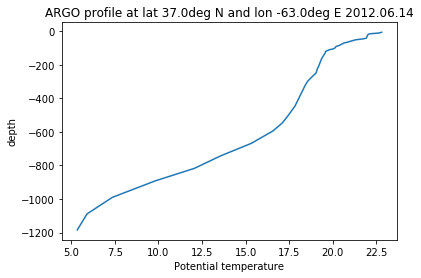

In [68]:
plot_temp_profile(t14natl[0])

In [71]:
def plot_sal_profile(nprof):
    plt.plot(sal_ar[nprof,:],-1*dep_ar[nprof,:])
    plt.xlabel('Practical salinity')
    plt.ylabel('depth')
    ts = pd.to_datetime(str(day_ar.values[nprof])) 
    d = ts.strftime('%Y.%m.%d')
    title="ARGO profile at lat "+str(np.trunc(lat_ar.values[nprof]))+"deg N and lon "+str(np.trunc(lon_ar.values[nprof]))+"deg E "+str(d)
    plt.title(title)

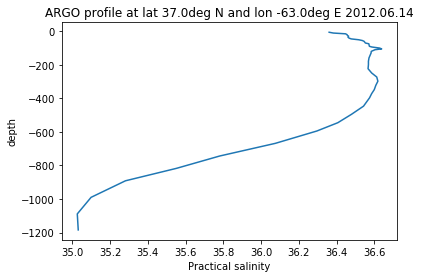

In [72]:
plot_sal_profile(t14natl[0])

## Find the equivalent NATL60 region,  +/- 1° , at the surface

In [73]:
natl60=xr.open_dataset(tfile)
dep_nat=natl60['deptht']
lat_nat=natl60['nav_lat']
lon_nat=natl60['nav_lon']
temp_nat=natl60['votemper']
sal_nat=natl60['vosaline']
day_nat=natl60['time_counter']


In [74]:
len(dep_nat.values)

300

In [75]:
latval=lat_nat.values
lonval=lon_nat.values
tempval=temp_nat[0,0].values
salval=sal_nat[0,0].values

In [76]:
tempval.shape

(3454, 5422)

In [40]:
def select_region_temp(latr,lonr):
    templat=tempval[np.where(np.abs(latval-latr)<1)]
    lonlat=lonval[np.where(np.abs(latval-latr)<1)]
    tempr=templat[np.where(np.abs(lonlat-lonr)<1)]
    return tempr

In [77]:
temp37N63W=select_region_temp(37,-63)

In [78]:
print 'taille=',temp37N63W.shape
print 'mean=',np.mean(temp37N63W)
print 'min=',np.min(temp37N63W)
print 'max=',np.max(temp37N63W)

taille= (18672,)
mean= 23.3423507441
min= 19.0094432831
max= 25.6885318756


In [79]:
def select_region_sal(latr,lonr):
    sallat=salval[np.where(np.abs(latval-latr)<1)]
    lonlat=lonval[np.where(np.abs(latval-latr)<1)]
    salr=sallat[np.where(np.abs(lonlat-lonr)<1)]
    return salr

In [80]:
sal37N63W=select_region_sal(37,-63)

In [81]:
print 'taille=',sal37N63W.shape
print 'mean=',np.mean(sal37N63W)
print 'min=',np.min(sal37N63W)
print 'max=',np.max(sal37N63W)

taille= (18672,)
mean= 36.4046774711
min= 34.9465904236
max= 36.5759429932


## Loop over depth

In [87]:
def select_profiles_temp(latr,lonr):
    latval=lat_nat.values
    lonval=lon_nat.values
    mean_prof_temp=np.zeros(len(dep_nat.values))
    min_prof_temp=np.zeros(len(dep_nat.values))
    max_prof_temp=np.zeros(len(dep_nat.values))
    for z in np.arange(len(dep_nat.values)):
        tempval=temp_nat[0,z].values
        templat=tempval[np.where(np.abs(latval-latr)<1)]
        lonlat=lonval[np.where(np.abs(latval-latr)<1)]
        tempz=templat[np.where(np.abs(lonlat-lonr)<1)]
        mean_prof_temp[z]=np.mean(tempz)
        min_prof_temp[z]=np.min(tempz)
        max_prof_temp[z]=np.max(tempz)
    return mean_prof_temp, min_prof_temp, max_prof_temp


In [88]:
mean_temp37N63W,min_temp37N63W,max_temp37N63W=select_profiles_temp(37,-63)

In [89]:
mean_temp37N63W.shape

(300,)

##Plot All

In [100]:
def plot_temp_profile_all(nprof,meant,mint,maxt,depmod):
    plt.plot(temp_ar[nprof,:],-1*dep_ar[nprof,:])
    plt.xlabel('Potential temperature')
    plt.ylabel('depth')
    plt.plot(meant,-1*depmod,'k-')
    plt.plot(mint,-1*depmod,'k.')
    plt.plot(maxt,-1*depmod,'k--')
    plt.legend(['ARGO','mean NATL60','min NATL60','max NATL60'])
    ts = pd.to_datetime(str(day_ar.values[nprof])) 
    d = ts.strftime('%Y.%m.%d')
    title="ARGO profile at lat "+str(np.trunc(lat_ar.values[nprof]))+"deg N and lon "+str(np.trunc(lon_ar.values[nprof]))+"deg E "+str(d)
    plt.title(title)

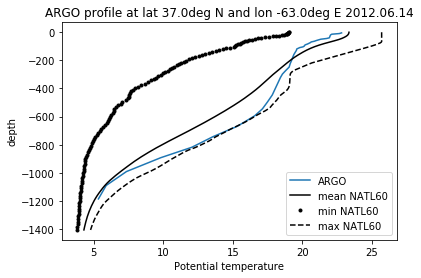

In [101]:
plot_temp_profile_all(t14natl[0],mean_temp37N63W,min_temp37N63W,max_temp37N63W,dep_nat)

In [98]:
def select_profiles_sal(latr,lonr):
    latval=lat_nat.values
    lonval=lon_nat.values
    mean_prof_sal=np.zeros(len(dep_nat.values))
    min_prof_sal=np.zeros(len(dep_nat.values))
    max_prof_sal=np.zeros(len(dep_nat.values))
    for z in np.arange(len(dep_nat.values)):
        salval=sal_nat[0,z].values
        sallat=salval[np.where(np.abs(latval-latr)<1)]
        lonlat=lonval[np.where(np.abs(latval-latr)<1)]
        salz=sallat[np.where(np.abs(lonlat-lonr)<1)]
        mean_prof_sal[z]=np.mean(salz)
        min_prof_sal[z]=np.min(salz)
        max_prof_sal[z]=np.max(salz)
    return mean_prof_sal, min_prof_sal, max_prof_sal
mean_sal37N63W,min_sal37N63W,max_sal37N63W=select_profiles_sal(37,-63)


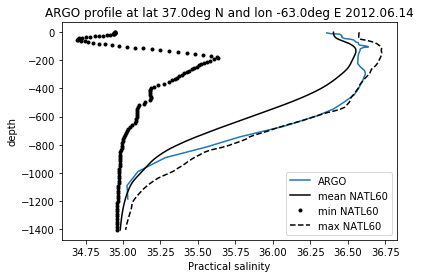

In [99]:
def plot_sal_profile_all(nprof,meant,mint,maxt,depmod):
    plt.plot(sal_ar[nprof,:],-1*dep_ar[nprof,:])
    plt.xlabel('Practical salinity')
    plt.ylabel('depth')
    plt.plot(meant,-1*depmod,'k-')
    plt.plot(mint,-1*depmod,'k.')
    plt.plot(maxt,-1*depmod,'k--')
    plt.legend(['ARGO','mean NATL60','min NATL60','max NATL60'])
    ts = pd.to_datetime(str(day_ar.values[nprof])) 
    d = ts.strftime('%Y.%m.%d')
    title="ARGO profile at lat "+str(np.trunc(lat_ar.values[nprof]))+"deg N and lon "+str(np.trunc(lon_ar.values[nprof]))+"deg E "+str(d)
    plt.title(title)
plot_sal_profile_all(t14natl[0],mean_sal37N63W,min_sal37N63W,max_sal37N63W,dep_nat)    